# Univariate Time Series

<b>Definition</b> from <a href='https://onlinecourses.science.psu.edu/stat510/node/47'>here</a>: <i>a sequence of measurements of the same variable collected over time</i>. Examples: stock prices, demand, housing prices.

In pandas a univariate time series is a Series object where the index is a "timestamp".

## Stock prices

Our goal is to create a Series object <i>stock</i> with the Google stock closing price.

<b>Stock History info:</b> You can get the Google stock historical price data from https://finance.yahoo.com/quote/GOOGL/history?p=GOOGL
In 'Historical Data' tab, set the 'Time Period' to Max, then 'Apply', then 'Download Data'. A .csv file will be downloaded into your local computer. Rename the file to **GOOGL.csv**

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The following code creates a Series object <i>stock</i> based on GOOGL.csv file. Index is the date and the variable is the Google stock closing prices. 

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('GOOGL.csv',index_col=0, parse_dates=True)
#or use the following two lines
#data = pd.read_csv('GOOGL.csv',index_col=0)
#data.index = data.index.astype('datetime64[ns]')

In [3]:
#Set to 2 decimal places, and display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.05,52.08,48.03,50.22,50.22,44659096
2004-08-20,50.56,54.59,50.30,54.21,54.21,22834343
2004-08-23,55.43,56.80,54.58,54.75,54.75,18256126
2004-08-24,55.68,55.86,51.84,52.49,52.49,15247337
2004-08-25,52.53,54.05,51.99,53.05,53.05,9188602


### Create an univariate time series based on stock closing price

In [5]:
stock = data['Close']

In [6]:
stock.describe()

count   4311.00
mean     634.47
std      548.16
min       50.06
25%      245.46
50%      400.26
75%      944.23
max     2904.31
Name: Close, dtype: float64

In [7]:
stock.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23',
               '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29',
               '2021-09-30', '2021-10-01'],
              dtype='datetime64[ns]', name='Date', length=4311, freq=None)

In [8]:
stock.values

array([  50.220219,   54.209209,   54.754753, ..., 2687.070068,
       2673.52002 , 2730.860107])

The following command will plot the stock price

Populating the interactive namespace from numpy and matplotlib


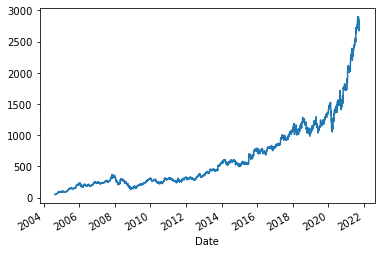

In [9]:
%pylab inline
stock.plot()

## Exploring a Time Series

This Series object has one entry for each trading day. The index (of type <i>datetime64</i>) is the day and the value (of type <i>float64</i>) is the closing price.

Let's take a look at the first 10 days of data

In [10]:
stock.head(10)

Date
2004-08-19   50.22
2004-08-20   54.21
2004-08-23   54.75
2004-08-24   52.49
2004-08-25   53.05
2004-08-26   54.01
2004-08-27   53.13
2004-08-30   51.06
2004-08-31   51.24
2004-09-01   50.18
Name: Close, dtype: float64

Let's take a look at the last 10 days of data

In [11]:
stock.tail(10)

Date
2021-09-20   2774.39
2021-09-21   2780.66
2021-09-22   2805.67
2021-09-23   2824.32
2021-09-24   2844.30
2021-09-27   2821.44
2021-09-28   2716.60
2021-09-29   2687.07
2021-09-30   2673.52
2021-10-01   2730.86
Name: Close, dtype: float64

In [12]:
stock.index[:10]

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [13]:
len(stock)

4311

## Questions

Answer these questions without using for loops.

<b>Question 1</b><br/>What day had the largest stock price and what's the price? 

In [14]:
stock.nlargest(1)

Date
2021-09-01   2904.31
Name: Close, dtype: float64

<b>Question 2</b><br/>What are the 10 days with largest stock price? Report both the day and the price.

In [15]:
stock.nlargest(10)

Date
2021-09-01   2904.31
2021-08-31   2893.95
2021-08-30   2891.81
2021-09-15   2888.59
2021-09-07   2885.61
2021-08-27   2880.08
2021-09-03   2874.79
2021-09-08   2873.82
2021-09-16   2872.20
2021-09-09   2870.82
Name: Close, dtype: float64

<b>Question 3</b><br/>How much profit (ratio) would we have made if we had bought at the beginning and sold everything on the last day? Do not type in any date.

In [16]:
(stock.values[-1] - stock.values[0] ) / stock.values[0]

53.37770207652818

Or ...

In [17]:
(stock.iloc[-1] - stock.iloc[0]) / stock.iloc[0]

53.37770207652818

In [18]:
(stock[-1] - stock[0]) / stock[0]

53.37770207652818

<b>Question 4</b><br/>
What is the moving average of the price at each trading session? Use a 50-trading-days window. <i>Hint</i>: Explore the method <i>rolling</i>

In [19]:
rol = stock.rolling(50)

In [20]:
type(rol)

pandas.core.window.rolling.Rolling

In [21]:
stock[:50].mean()

63.58698695999998

In [22]:
rol.mean()

Date
2004-08-19       nan
2004-08-20       nan
2004-08-23       nan
2004-08-24       nan
2004-08-25       nan
               ...  
2021-09-27   2766.94
2021-09-28   2771.44
2021-09-29   2774.70
2021-09-30   2777.15
2021-10-01   2780.40
Name: Close, Length: 4311, dtype: float64

Set the numbers of rows to show in a truncated view to 100 rows

In [23]:
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 100)

If want to set unlimited number of rows(all rows), then use the following  

In [24]:
#pd.set_option('display.max_rows', None)

In [25]:
rol.mean()

Date
2004-08-19       nan
2004-08-20       nan
2004-08-23       nan
2004-08-24       nan
2004-08-25       nan
2004-08-26       nan
2004-08-27       nan
2004-08-30       nan
2004-08-31       nan
2004-09-01       nan
2004-09-02       nan
2004-09-03       nan
2004-09-07       nan
2004-09-08       nan
2004-09-09       nan
2004-09-10       nan
2004-09-13       nan
2004-09-14       nan
2004-09-15       nan
2004-09-16       nan
2004-09-17       nan
2004-09-20       nan
2004-09-21       nan
2004-09-22       nan
2004-09-23       nan
2004-09-24       nan
2004-09-27       nan
2004-09-28       nan
2004-09-29       nan
2004-09-30       nan
2004-10-01       nan
2004-10-04       nan
2004-10-05       nan
2004-10-06       nan
2004-10-07       nan
2004-10-08       nan
2004-10-11       nan
2004-10-12       nan
2004-10-13       nan
2004-10-14       nan
2004-10-15       nan
2004-10-18       nan
2004-10-19       nan
2004-10-20       nan
2004-10-21       nan
2004-10-22       nan
2004-10-25       nan
2004-10-

<b>Question 5</b><br/>
Consider this investment strategy: buy on day x and then sell after 5 days (on day x+5). Find the expected profit (in %) of this operation. <i>Hint</i>: explore the method <i>shift</i>

In [26]:
stock.head()

Date
2004-08-19   50.22
2004-08-20   54.21
2004-08-23   54.75
2004-08-24   52.49
2004-08-25   53.05
Name: Close, dtype: float64

In [27]:
stock.shift(-1).head()

Date
2004-08-19   54.21
2004-08-20   54.75
2004-08-23   52.49
2004-08-24   53.05
2004-08-25   54.01
Name: Close, dtype: float64

In [28]:
stock.head(6)

Date
2004-08-19   50.22
2004-08-20   54.21
2004-08-23   54.75
2004-08-24   52.49
2004-08-25   53.05
2004-08-26   54.01
Name: Close, dtype: float64

In [29]:
stock.shift(-5).head(1)

Date
2004-08-19   54.01
Name: Close, dtype: float64

In [30]:
stock.shift(-5)[:1]

Date
2004-08-19   54.01
Name: Close, dtype: float64

In [31]:
futurePrices = stock.shift(-5)

In [32]:
profits = (futurePrices - stock) / stock

In [33]:
profits.mean()

0.005460393627697345

In [34]:
profits.describe()

count   4306.00
mean       0.01
std        0.04
min       -0.18
25%       -0.02
50%        0.01
75%        0.03
max        0.32
Name: Close, dtype: float64

So what exactly profit average means ?  Assuming invest $100 on day 1. 

In [35]:
100 * profits.mean() * len(stock)

2353.975692900325

To be more precise ..

In [36]:
100* profits.mean() * (len(stock)-5)

2351.2454960864766

<b>Question 6</b><br/>
Consider this investment strategy: buy whenever the price goes above the 20-day moving average, and then sell after 5 trading sessions. How much profit (in %) would we make on average?

In [37]:
movavg = stock.rolling(20).mean()

In [38]:
profit = (stock.shift(-5) - stock) / stock

In [39]:
profit[stock > movavg].mean()

0.005833870027942591

In [40]:
len(profit[stock > movavg])

2583

With the same $100.00 to start with, we get the profit ...

In [41]:
100 * profit[stock > movavg].mean() * len(profit[stock > movavg])

1506.888628217571

## Median prices of single family homes in zip code 95050

The file <i>santaclara_sfh.csv</i> was downloaded from <a href= 'http://zillow.com'>zillow.com</a>. For each end of month day, this file reports the median price of a single family home (sfh) in zip code 95050 over the previous 3 months. The data starts from 2012-01-31 and ends on recent month.

The following code loads and cleans the data set <i>santaclara_sfh.csv</i>, which you should copy into the same folder as this Jupyter notebook. For the moment, do not worry about understanding the code.

In [42]:
df = pd.read_csv('santaclara_sfh.csv', index_col='date', parse_dates=True)
df['median_sfh_price_past_3_months'] = df.median_sfh_price_past_3_months + 0.0 
housing = df['median_sfh_price_past_3_months']
housing.name = 'housing'

In [43]:
## older version code. don't worry about understanding this code
#df = pd.read_csv('santaclara_sfh.csv')
## make the date column of type datetime
#df['date'] = pd.to_datetime(df.date)
## make the price column of type float
#df['median_sfh_price_past_3_months'] = df.median_sfh_price_past_3_months + 0.0 
## make date the index 
#df.set_index('date',inplace=True) 
## take the series of median prices
#housing = df['median_sfh_price_past_3_months']
#housing.name = 'housing'

Let's take a look at the oldest prices

In [44]:
housing.head()

date
2012-01-31   485000.00
2012-02-29   528000.00
2012-03-31   568000.00
2012-04-30   620000.00
2012-05-31   630000.00
Name: housing, dtype: float64

Remember that each price is the median over the previous three months. So, for example, the median sale price in the period from 2012-02-01 to 2012-04-30 was $620,000. Let's plot it.

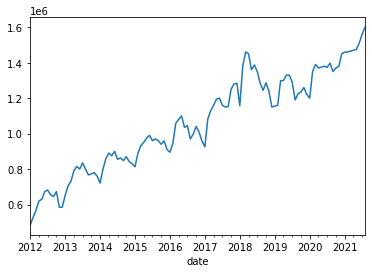

In [45]:
housing.plot()

## Are housing prices correlated to stock prices?

<p>To anwer this question, we first need to align the two Series. The Series <i>housing</i> has one entry for each ending day of each month and a value that is the 3-month moving average; the series <i>stock</i> has one entry for each <b>trading day</b> and the value that is the closing price. </p>
<p>To align the two Series, we will create a new Series of stock prices that has only one entry for every month-end-day and reports the 3-month moving median price of the stock</p>

<p>We will do the following:
<ol>
<li>Pad <i>stock</i> so that there are no missing days (currently, holidays are missing)
<li>Compute the 3-month moving median of <i>stock</i>
<li>Retain only the end-of-month days in <i>stock</i>
</ol>
</p>


#### Step #1: Pad stock so that there are no missing days (currently, holidays are missing)

In [46]:
padded = stock.asfreq(freq='1D', method='ffill')

In [47]:
stock[:10]

Date
2004-08-19   50.22
2004-08-20   54.21
2004-08-23   54.75
2004-08-24   52.49
2004-08-25   53.05
2004-08-26   54.01
2004-08-27   53.13
2004-08-30   51.06
2004-08-31   51.24
2004-09-01   50.18
Name: Close, dtype: float64

In [48]:
padded[:20]

Date
2004-08-19   50.22
2004-08-20   54.21
2004-08-21   54.21
2004-08-22   54.21
2004-08-23   54.75
2004-08-24   52.49
2004-08-25   53.05
2004-08-26   54.01
2004-08-27   53.13
2004-08-28   53.13
2004-08-29   53.13
2004-08-30   51.06
2004-08-31   51.24
2004-09-01   50.18
2004-09-02   50.81
2004-09-03   50.06
2004-09-04   50.06
2004-09-05   50.06
2004-09-06   50.06
2004-09-07   50.84
Freq: D, Name: Close, dtype: float64

#### Step #2: Compute the 90-day moving median of stock

In [49]:
movmed = padded.rolling(90).median()

In [50]:
movmed[80:100]

Date
2004-11-07     nan
2004-11-08     nan
2004-11-09     nan
2004-11-10     nan
2004-11-11     nan
2004-11-12     nan
2004-11-13     nan
2004-11-14     nan
2004-11-15     nan
2004-11-16   66.36
2004-11-17   66.98
2004-11-18   67.65
2004-11-19   68.15
2004-11-20   68.69
2004-11-21   68.85
2004-11-22   68.93
2004-11-23   68.93
2004-11-24   69.09
2004-11-25   69.37
2004-11-26   69.90
Freq: D, Name: Close, dtype: float64

#### Step #3: Retain the same days as in the housing Series

In [51]:
housing.index[:10]

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [52]:
mod_stock = movmed[housing.index]

In [53]:
mod_stock[:10]

date
2012-01-31   310.49
2012-02-29   310.49
2012-03-31   306.86
2012-04-30   307.37
2012-05-31   306.92
2012-06-30   300.23
2012-07-31   293.29
2012-08-31   295.52
2012-09-30   335.02
2012-10-31   342.89
Name: Close, dtype: float64

### Compute correlation

Are stock and housing prices correlated?

In [54]:
housing.corr(mod_stock)

0.9043285675908926

Uh... yes, they are strongly correlated

Let's plot them

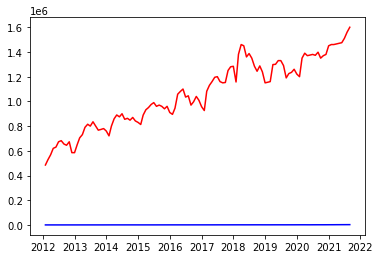

In [55]:
import matplotlib.pyplot as plt

plt.plot(mod_stock,'b')  # b for "blue"
plt.plot(housing,'r') # r for "red" 
plt.show()

mmm... the problem is that the two scales are very different: housing is about 1M dollars while the stock price is in the order of hundreds of dollars. 

Let's normalize them so that the value on the first day (2012-01-31) is 1 for both series.

In [56]:
norm_stock = mod_stock / mod_stock[0]

In [57]:
norm_housing = housing / housing.iloc[0]

Plot the normalized data again

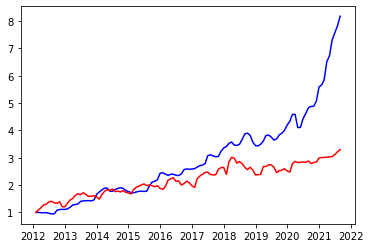

In [58]:
plt.plot(norm_stock,'b')  # b for "blue"
plt.plot(norm_housing,'r') # r for "red" 
plt.show()

Assign proper legends for different lines

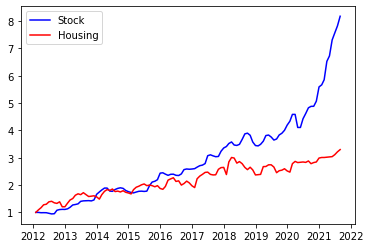

In [59]:
plt.plot(norm_stock,'b')  # b for "blue"
plt.plot(norm_housing,'r') # r for "red" 
plt.legend(['Stock','Housing'])
plt.show()